  **IRIS FLOWER CLASSIFICATION**

**PROBLEM STATEMENT**

To create a model that can accurately
predict the species of an iris flower based on its sepal length,
sepal width, petal length, and petal width. In this project, we
will explore the process of building a machine learning model
for iris flower classification. The task is to train a machine learning model that can learn from the measurements of the iris species and classify them.


**PROBLEM OBJECTIVE**

The goal is to create a machine learning model that can learn from the measurements of the irises whose species are already known from the given dataset so that we can predict the species for the new irises.

**PROJECT OUTCOME**

The outcome of Iris flower classification with machine learning involves accurately categorizing iris flowers into one of three species based on their sepal length, sepal width, petal length, and petal width. The three species of iris flowers typically used in this classification task are Setosa, Versicolor, and Virginica.

**DATASET INFORMATION**

The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2.

Attribute Information:

*   sepal length in cm
*   sepal width in cm
*   petal length in cm
*   petal width in cm
*  class: -- Iris Setosa -- Iris Versicolour -- Iris Virginica










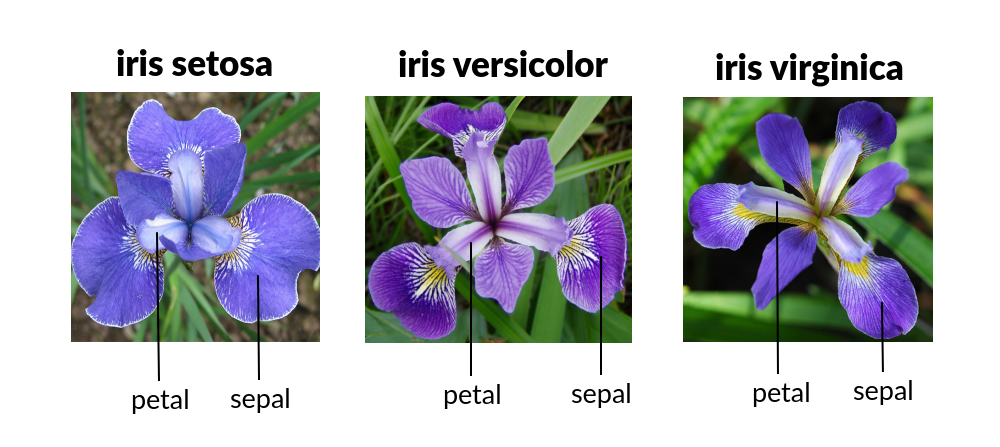


**IMPORTING PYTHON LIBRARIES**

**Pandas** - It has functions for analyzing, cleaning, exploring, and manipulating data.

**Numpy** - It is used to perform a wide variety of mathematical operations on arrays.

**Seaborn** - It is used to visualize random distributions.

**Matplotlib** - cross-platform, data visualization and graphical plotting library

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Library used for ML Model implementation
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
# Library used for ignore warnings
from warnings import filterwarnings
filterwarnings(action='ignore')

**LOADING DATASET**

In [ ]:
iris=pd.read_csv("/content/Iris.csv")
print(iris)

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa  
..              ...  
145  

The Iris dataset consists of length and width mesurements of sepal and petal for different species in centimeter.

There are 150 rows and 6 columns provided in the data.

**PREPROCESSING THE DATASET**

In [ ]:
#Checking for null values
print(iris.isna().sum())

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


In [ ]:
#Checking for duplicate values
print(iris.duplicated().sum())

0


The describe() function applies basic statistical computations on the dataset like extreme values, count of data points standard deviation, etc.

In [ ]:
print(iris.describe())

               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000


By preprocessing the dataset we have come know that,

*   no null values exist
*  no duplicate values exist



**EXPLORING THE DATASET**

In [ ]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
iris.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [ ]:
iris['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

From the dataset each species contains 50 instances

**VISUALIZING THE DATASET**

Distribution of Numerical Variables

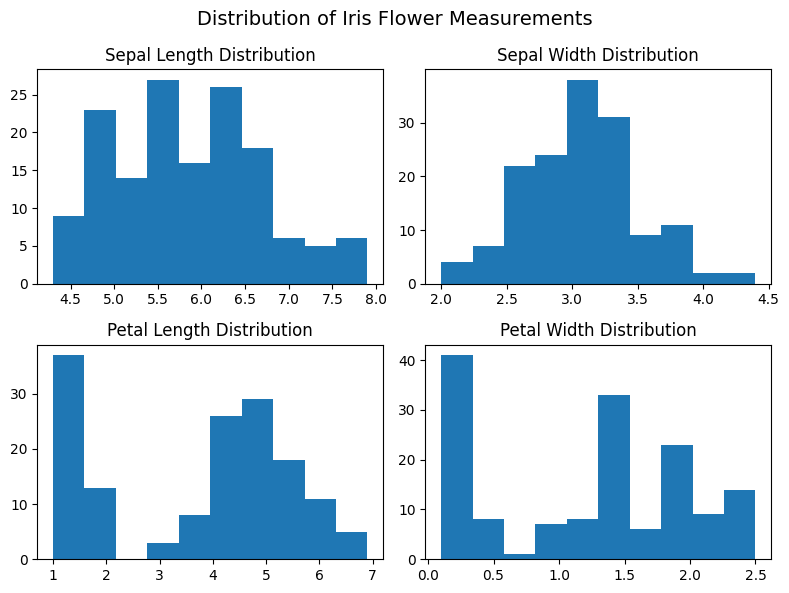

In [ ]:
# Histogram visualization code for distribution of numerical variables
# Create a figure with subplots
plt.figure(figsize=(8, 6))
plt.suptitle('Distribution of Iris Flower Measurements', fontsize=14)

# Create a 2x2 grid of subplots
plt.subplot(2, 2, 1)  # Subplot 1 (Top-Left)
plt.hist(iris['SepalLengthCm'])
plt.title('Sepal Length Distribution')

plt.subplot(2, 2, 2)  # Subplot 2 (Top-Right)
plt.hist(iris['SepalWidthCm'])
plt.title('Sepal Width Distribution')

plt.subplot(2, 2, 3)  # Subplot 3 (Bottom-Left)
plt.hist(iris['PetalLengthCm'])
plt.title('Petal Length Distribution')

plt.subplot(2, 2, 4)  # Subplot 4 (Bottom-Right)
plt.hist(iris['PetalWidthCm'])
plt.title('Petal Width Distribution')

# Display the subplots
plt.tight_layout()  # Helps in adjusting the layout
plt.show()

1.Sepal Length vs Sepal Width

In [ ]:
# Define colors for each species and the corresponding species labels.
colors = ['red', 'yellow', 'green']
species = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

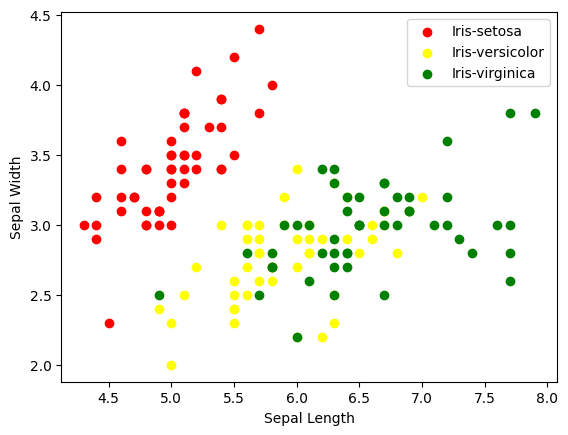

In [ ]:
#Scatter plot visualization code for Sepal Length vs Sepal Width for each species.

for i in range(3):
    # Select data for the current species.
    x = iris[iris['Species'] == species[i]]

    # Create a scatter plot with the specified color and label for the current species.
    plt.scatter(x['SepalLengthCm'], x['SepalWidthCm'], c=colors[i], label=species[i])

# Add labels to the x and y axes.
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

# Add a legend to identify species based on colors.
plt.legend()

# Display the scatter plot.
plt.show()

2.Petal Length vs Petal Width

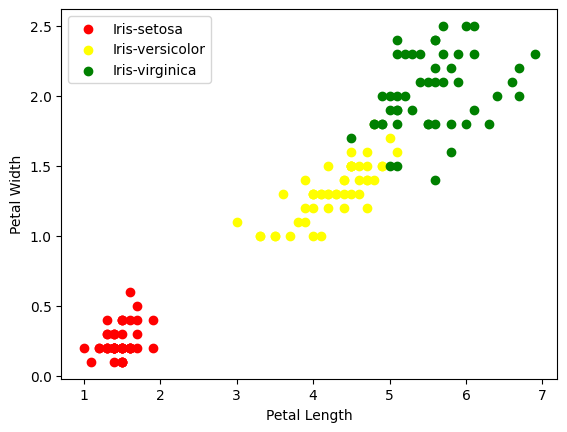

In [ ]:
#Scatter plot visualization code for Petal Length vs Petal Width for each species.

for i in range(3):
    # Select data for the current species.
    x = iris[iris['Species'] == species[i]]

    # Create a scatter plot with the specified color and label for the current species.
    plt.scatter(x['PetalLengthCm'], x['PetalWidthCm'], c=colors[i], label=species[i])

# Add labels to the x and y axes.
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

# Add a legend to identify species based on colors.
plt.legend()

# Display the scatter plot.
plt.show()

3. Sepal Length vs Petal Length

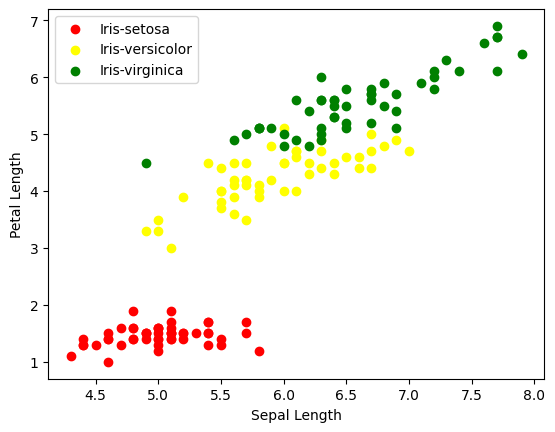

In [ ]:
# Scatter plot visualization code for Sepal Length vs Petal Length for each species.
for i in range(3):
    # Select data for the current species.
    x = iris[iris['Species'] == species[i]]

    # Create a scatter plot with the specified color and label for the current species.
    plt.scatter(x['SepalLengthCm'], x['PetalLengthCm'], c=colors[i], label=species[i])

# Add labels to the x and y axes.
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')

# Add a legend to identify species based on colors.
plt.legend()

# Display the scatter plot.
plt.show()

4. Sepal Width vs Petal Width

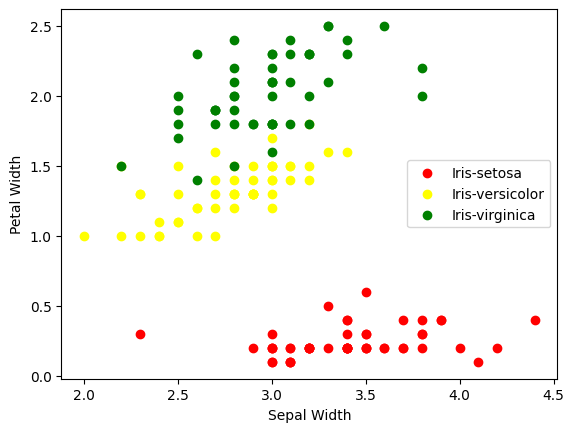

In [ ]:
# Scatter plot visualization code for Sepal Width vs Petal Width for each species.
for i in range(3):
    # Select data for the current species.
    x = iris[iris['Species'] == species[i]]

    # Create a scatter plot with the specified color and label for the current species.
    plt.scatter(x['SepalWidthCm'], x['PetalWidthCm'], c=colors[i], label=species[i])

# Add labels to the x and y axes.
plt.xlabel('Sepal Width')
plt.ylabel('Petal Width')

# Add a legend to identify species based on colors.
plt.legend()

# Display the scatter plot.
plt.show()



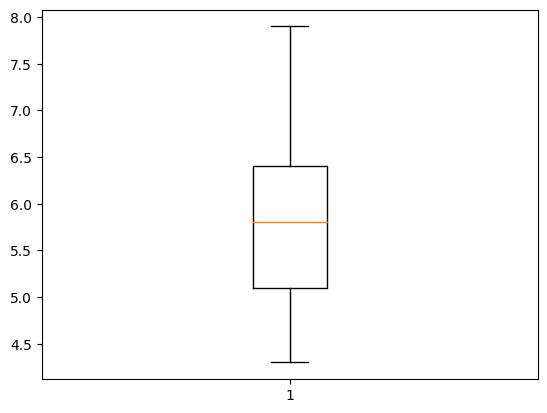

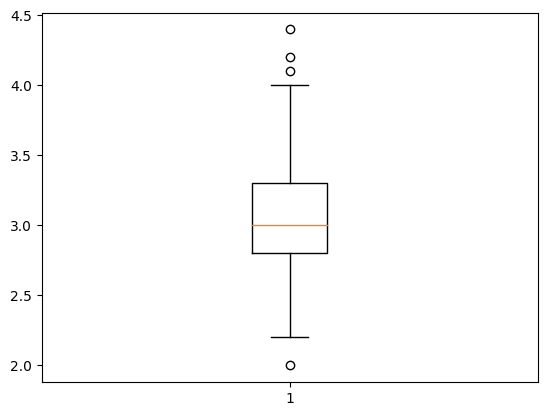

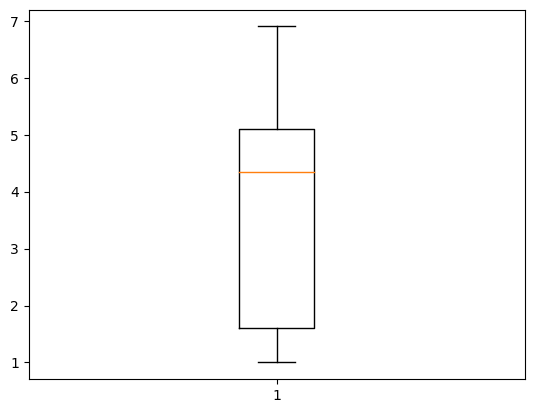

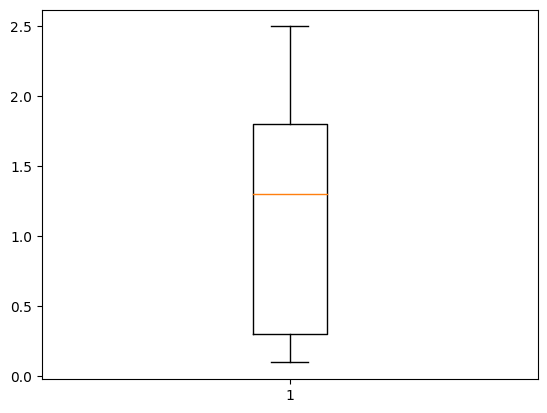

In [ ]:
#Checking for outliers

plt.figure(1)
plt.boxplot([iris['SepalLengthCm']])
plt.figure(2)
plt.boxplot([iris['SepalWidthCm']])
plt.figure(3)
plt.boxplot([iris['PetalLengthCm']])
plt.figure(4)
plt.boxplot([iris['PetalWidthCm']])
plt.show()

<Axes: xlabel='Species', ylabel='SepalWidthCm'>

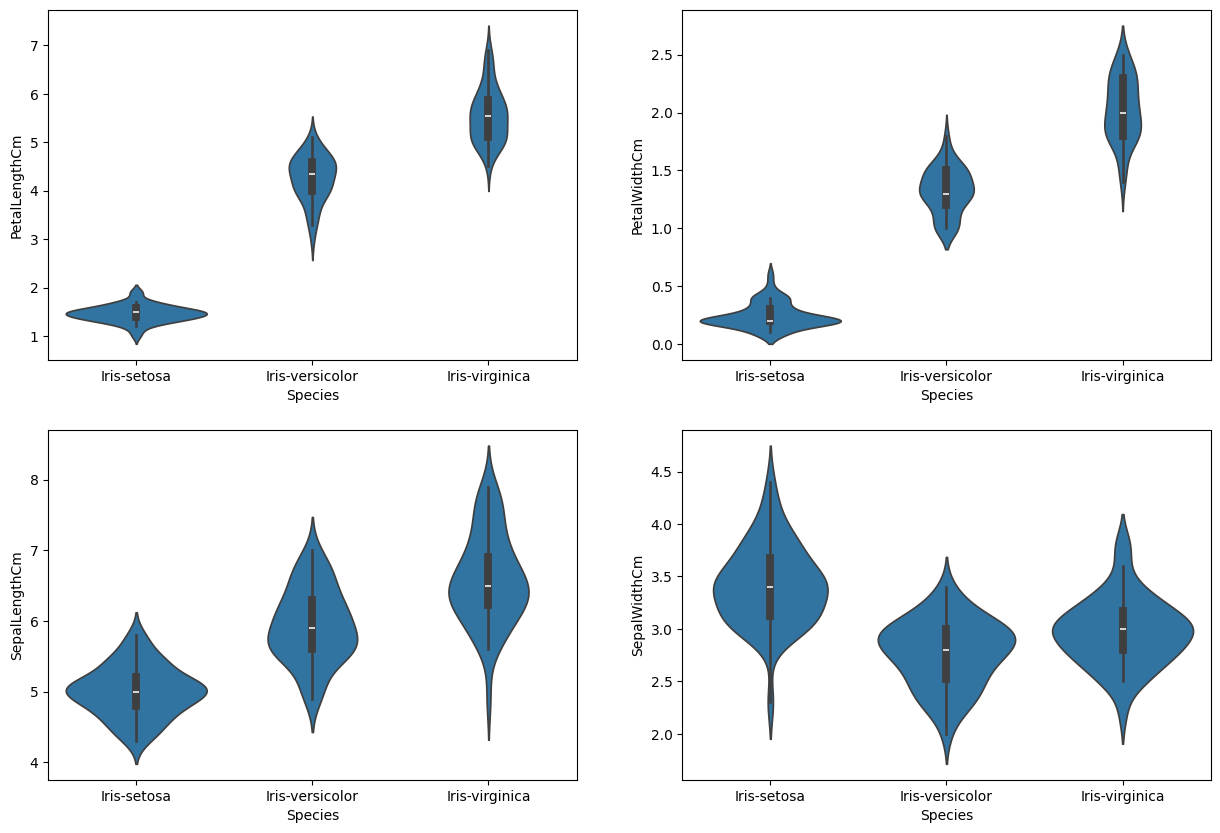

In [ ]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='Species',y='PetalLengthCm',data=iris)
plt.subplot(2,2,2)
sns.violinplot(x='Species',y='PetalWidthCm',data=iris)
plt.subplot(2,2,3)
sns.violinplot(x='Species',y='SepalLengthCm',data=iris)
plt.subplot(2,2,4)
sns.violinplot(x='Species',y='SepalWidthCm',data=iris)

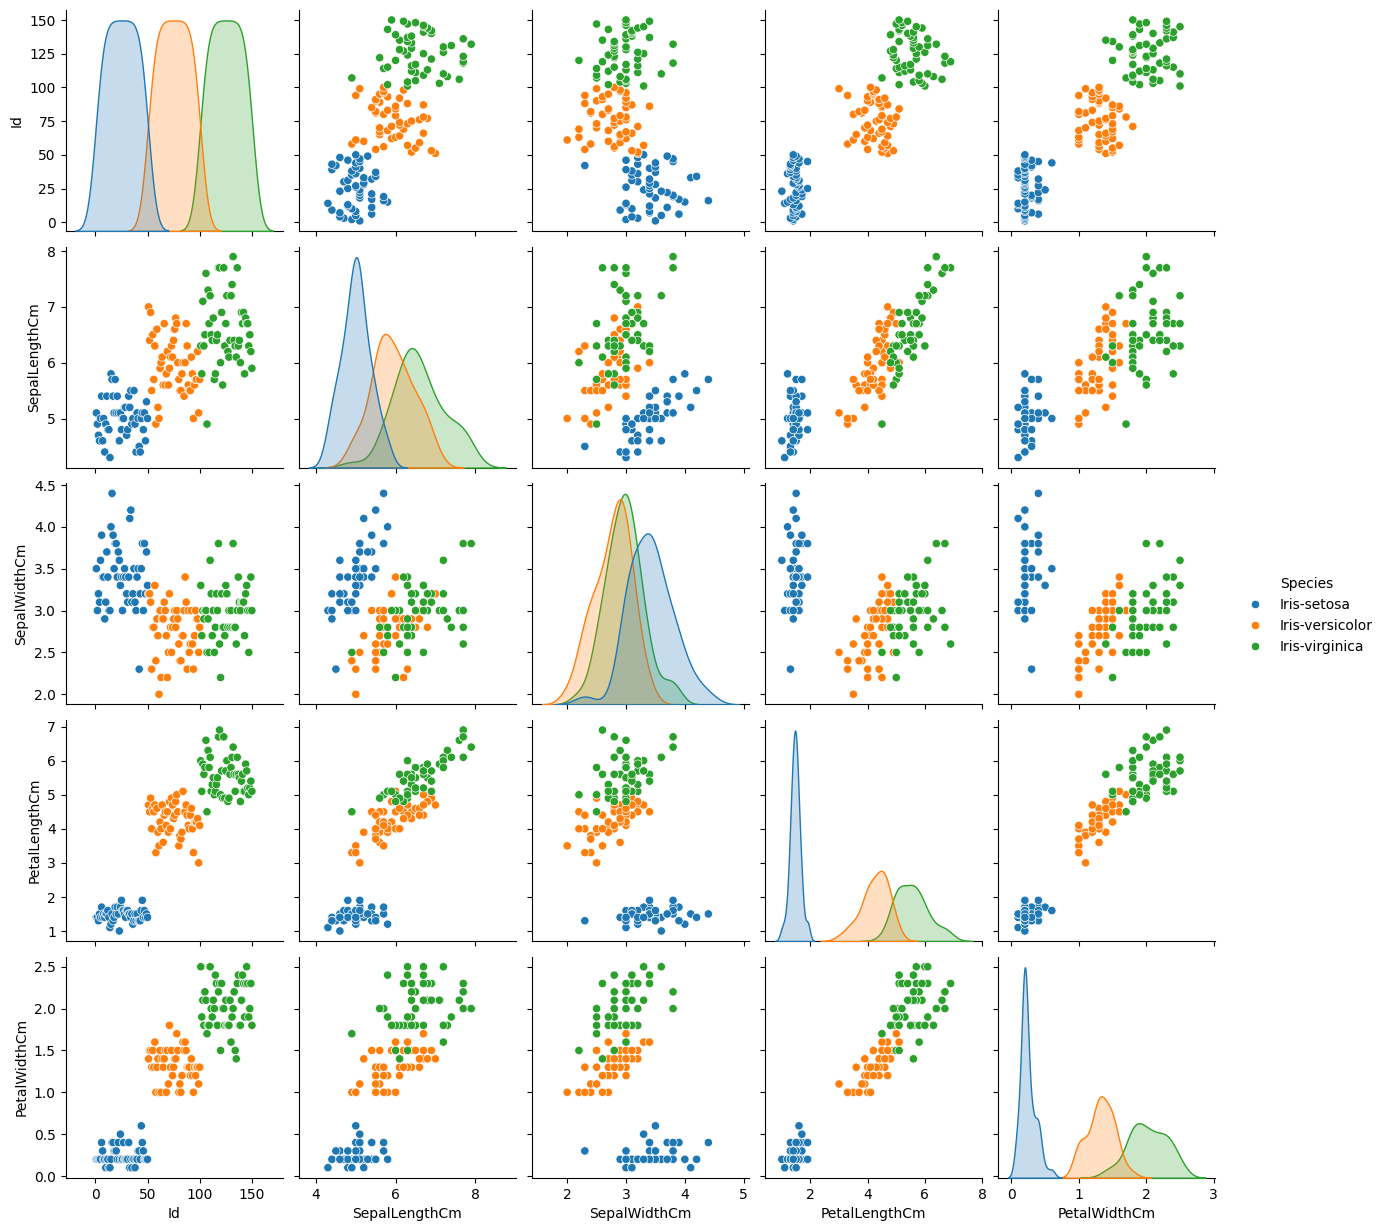

In [ ]:
# Visualize the whole dataset
import seaborn as sns
sns.pairplot(iris,hue='Species')

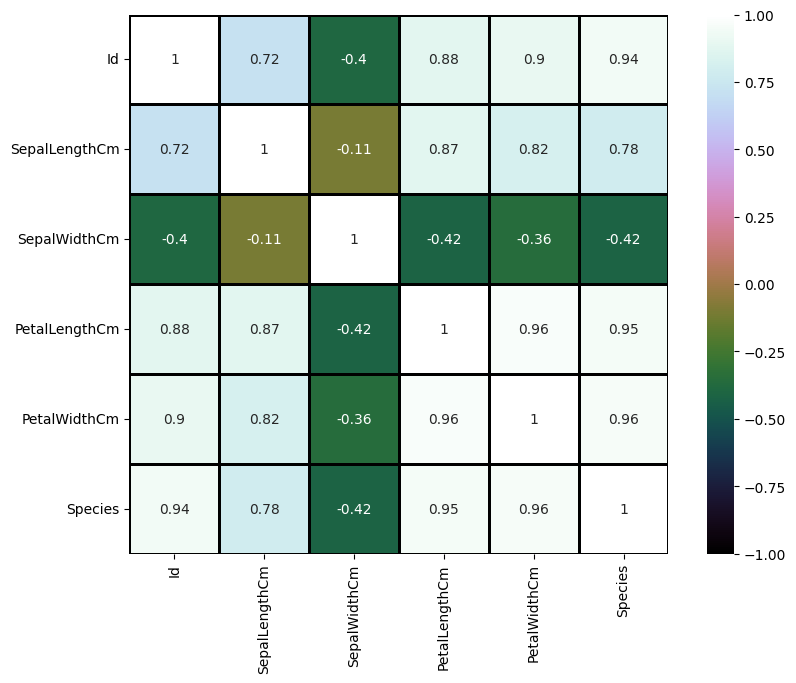

In [ ]:
# Convert the 'Species' column to numeric values using label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
iris['Species'] = le.fit_transform(iris['Species'])

# Create the heatmap
fig = plt.gcf()
fig.set_size_inches(10, 7)
fig = sns.heatmap(iris.corr(), annot=True, cmap='cubehelix', linewidths=1, linecolor='k', square=True, mask=False, vmin=-1, vmax=1, cbar_kws={"orientation": "vertical"}, cbar=True)

**TRAINING AND TESTING**

In [ ]:
# Splitting the dataset to test and train
train, test = train_test_split(iris, test_size = 0.4)
print(train.shape)
print(test.shape)

(90, 6)
(60, 6)


In [ ]:
train_X = train[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm','PetalWidthCm']]
train_y = train.Species
test_X = test[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm','PetalWidthCm']]
test_y = test.Species

In [ ]:
print(train.columns)

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')


In [ ]:
train_X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
113,5.7,2.5,5.0,2.0
110,6.5,3.2,5.1,2.0
21,5.1,3.7,1.5,0.4
44,5.1,3.8,1.9,0.4
105,7.6,3.0,6.6,2.1


In [ ]:
test_X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
109,7.2,3.6,6.1,2.5
116,6.5,3.0,5.5,1.8
81,5.5,2.4,3.7,1.0
138,6.0,3.0,4.8,1.8
88,5.6,3.0,4.1,1.3


In [ ]:
train_y.head()

113    Iris-virginica
110    Iris-virginica
21        Iris-setosa
44        Iris-setosa
105    Iris-virginica
Name: Species, dtype: object

In [ ]:
test_y.head()

109     Iris-virginica
116     Iris-virginica
81     Iris-versicolor
138     Iris-virginica
88     Iris-versicolor
Name: Species, dtype: object

**MODELING TRAINING AND EVALUATION**

In [ ]:
#Using LogisticRegression
model = LogisticRegression()
model.fit(train_X, train_y)
model.score(test_X,test_y)
y_pred = model.predict(test_X)
print('Accuracy score:',metrics.accuracy_score(test_y,y_pred))

Accuracy score: 0.95


In [ ]:
# A detailed classification report
print(classification_report(test_y,y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        18
Iris-versicolor       0.92      0.96      0.94        23
 Iris-virginica       0.94      0.89      0.92        19

       accuracy                           0.95        60
      macro avg       0.95      0.95      0.95        60
   weighted avg       0.95      0.95      0.95        60



In [ ]:
#Using Support Vector
from sklearn.svm import SVC
model1 = SVC()
model1.fit(train_X,train_y)
y_pred1 = model1.predict(test_X)
print("Accuracy Score=",accuracy_score(test_y,y_pred1))

Accuracy Score= 0.9333333333333333


In [ ]:
# A detailed classification report
print(classification_report(test_y, y_pred1))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        18
Iris-versicolor       0.88      0.96      0.92        23
 Iris-virginica       0.94      0.84      0.89        19

       accuracy                           0.93        60
      macro avg       0.94      0.93      0.94        60
   weighted avg       0.94      0.93      0.93        60



In [ ]:
#Using KNN Neighbors
from sklearn.neighbors import KNeighborsClassifier
model2 = KNeighborsClassifier(n_neighbors=5)
model2.fit(train_X,train_y)
y_pred2 = model2.predict(test_X)
print("Accuracy Score:",accuracy_score(test_y,y_pred2))

Accuracy Score: 0.95


In [ ]:
# A detailed classification report
print(classification_report(test_y, y_pred2))


                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        18
Iris-versicolor       0.95      0.91      0.93        23
 Iris-virginica       0.90      0.95      0.92        19

       accuracy                           0.95        60
      macro avg       0.95      0.95      0.95        60
   weighted avg       0.95      0.95      0.95        60



In [ ]:
#Using GaussianNB
from sklearn.naive_bayes import GaussianNB
model3 = GaussianNB()
model3.fit(train_X,train_y)
y_pred3 = model3.predict(test_X)
print("Accuracy Score:",accuracy_score(test_y,y_pred3))

Accuracy Score: 0.95


In [ ]:
# A detailed classification report
print(classification_report(test_y, y_pred3))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        18
Iris-versicolor       0.92      0.96      0.94        23
 Iris-virginica       0.94      0.89      0.92        19

       accuracy                           0.95        60
      macro avg       0.95      0.95      0.95        60
   weighted avg       0.95      0.95      0.95        60



In [ ]:
#Using Decision Tree
from sklearn.tree import DecisionTreeClassifier
model4 = DecisionTreeClassifier(criterion='entropy',random_state=7)
model4.fit(train_X,train_y)
y_pred4 = model4.predict(test_X)
print("Accuracy Score:",accuracy_score(test_y,y_pred4))

Accuracy Score: 0.9166666666666666


In [ ]:
# A detailed classification report
print(classification_report(test_y, y_pred4))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        18
Iris-versicolor       0.85      0.96      0.90        23
 Iris-virginica       0.94      0.79      0.86        19

       accuracy                           0.92        60
      macro avg       0.93      0.92      0.92        60
   weighted avg       0.92      0.92      0.92        60



The classification report gives a detailed report of the prediction.

Precision defines the ratio of true positives to the sum of true positive and false positives.

Recall defines the ratio of true positive to the sum of true positive and false negative.

F1-score is the mean of precision and recall value.

Support is the number of actual occurrences of the class in the specified dataset.

In [ ]:
results = pd.DataFrame({
    'Model': ['Logistic Regression','Support Vector Machines','KNN' ,'GaussianNB','Decision Tree'],
    'Score': [accuracy_score(test_y,y_pred),accuracy_score(test_y,y_pred1),accuracy_score(test_y,y_pred2),accuracy_score(test_y,y_pred3),accuracy_score(test_y,y_pred4)]})

result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
0.950000,Logistic Regression
0.950000,KNN
0.950000,GaussianNB
0.933333,Support Vector Machines
0.916667,Decision Tree


Finally, it classified flowers into their species.

